In [2]:
#Logistic Regression 
#Import the Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
#Load the Data Set 
os.chdir('D:\DATA SCIENCE\MACHINE LEARNING\Logistic regression')
df1 = pd.read_csv('Social_Network_Ads.csv')
print (df1)


      User ID  Gender  Age  EstimatedSalary  Purchased
0    11021175    Male   42           121315          0
1    17782313    Male   53            67214          0
2    14603818  Female   59           111005          0
3    18188198  Female   39            53414          0
4    19357305    Male   39           114285          0
..        ...     ...  ...              ...        ...
395  10220446  Female   20           141231          1
396  12387292    Male   50            75848          1
397  10715173  Female   25            82560          1
398  10016842    Male   55           147667          0
399  11699655  Female   54           134972          1

[400 rows x 5 columns]


In [4]:
print (df1.describe ())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.510090e+07   39.885000     99748.227500    0.357500
std    2.862593e+06   11.796596     28374.358336    0.479864
min    1.001684e+07   20.000000     50075.000000    0.000000
25%    1.260593e+07   30.000000     76060.250000    0.000000
50%    1.509874e+07   40.000000     99205.000000    0.000000
75%    1.741296e+07   51.000000    122748.000000    1.000000
max    1.999616e+07   60.000000    149553.000000    1.000000


In [6]:
print (df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [8]:
#Independent Variable X (Age and Estimated Salary)
x = df1.iloc [:,2:4].values
print (x) 

[[    42 121315]
 [    53  67214]
 [    59 111005]
 [    39  53414]
 [    39 114285]
 [    39 107458]
 [    20  85582]
 [    59 148335]
 [    48  80579]
 [    42 114204]
 [    32  87786]
 [    49 113544]
 [    55  88300]
 [    54 147066]
 [    57 139622]
 [    41 134716]
 [    51 116333]
 [    55  72567]
 [    44 123254]
 [    47 113548]
 [    52  79343]
 [    20 106149]
 [    40  59674]
 [    52  76333]
 [    28 118742]
 [    22 105897]
 [    25 114815]
 [    38  85428]
 [    57 114005]
 [    57 133402]
 [    43 106726]
 [    35  84550]
 [    34  96296]
 [    32  68964]
 [    55  90946]
 [    48  51787]
 [    22  53940]
 [    42 138928]
 [    59 116474]
 [    23  97284]
 [    40 132951]
 [    24 119308]
 [    50 120675]
 [    41 113547]
 [    52 102686]
 [    34 140262]
 [    20  54075]
 [    25  63715]
 [    46  56058]
 [    58  65052]
 [    38  72107]
 [    21 108656]
 [    42 120639]
 [    31  68033]
 [    26  80283]
 [    47  60952]
 [    31 123137]
 [    36  98529]
 [    25 12130

In [9]:
#Dependent Variable y

y = df1.iloc[:,4].values
print (y)


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


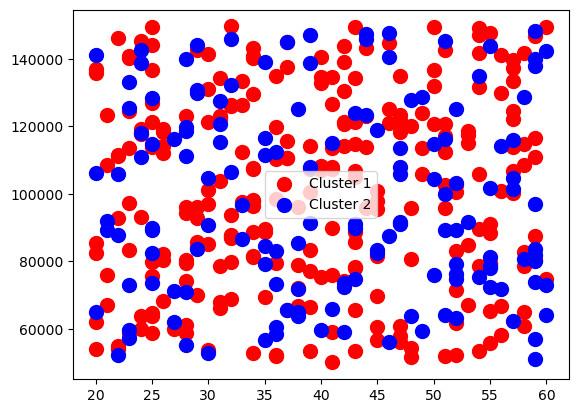

In [10]:
#plot the Graph 
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y == 1,0],x[y == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show()


In [11]:

#Feature Scaling – Standardization (To standardize Salary)
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x= sc_x.fit_transform(x)
print(x)


[[ 0.17951354  0.76103154]
 [ 1.11315372 -1.14804259]
 [ 1.622412    0.39722026]
 [-0.0751156  -1.63500628]
 [-0.0751156   0.51296235]
 [-0.0751156   0.27205647]
 [-1.68776681 -0.49988685]
 [ 1.622412    1.71449234]
 [ 0.68877182 -0.67642883]
 [ 0.17951354  0.51010409]
 [-0.66925025 -0.42211381]
 [ 0.7736482   0.48681452]
 [ 1.28290648 -0.40397617]
 [ 1.1980301   1.66971285]
 [ 1.45265924  1.40703476]
 [ 0.09463716  1.23391563]
 [ 0.94340096  0.58523059]
 [ 1.28290648 -0.95915007]
 [ 0.3492663   0.82945347]
 [ 0.60389544  0.48695567]
 [ 1.02827734 -0.72004384]
 [-1.68776681  0.2258655 ]
 [ 0.00976078 -1.41410826]
 [ 1.02827734 -0.82625839]
 [-1.00875577  0.67023751]
 [-1.51801405  0.21697311]
 [-1.26338491  0.53166458]
 [-0.15999198 -0.50532108]
 [ 1.45265924  0.50308193]
 [ 1.45265924  1.18754822]
 [ 0.26438992  0.24622622]
 [-0.41462111 -0.53630326]
 [-0.49949749 -0.12181953]
 [-0.66925025 -1.08628994]
 [ 1.28290648 -0.31060618]
 [ 0.68877182 -1.6924186 ]
 [-1.51801405 -1.6164452 ]
 

In [12]:
#Train Test Split Data 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)
print (x.shape)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)


(400, 2)
(320, 2)
(80, 2)
(320,)
(80,)


In [13]:
#Create Model 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print (lr)


LogisticRegression()


In [14]:
#Predict the Result (Test Data Set) 
y_pred= lr.predict(x_test)
print (y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [15]:
#Display y_test 
print (y_test)


[1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0
 0 0 1 1 0 0]


In [16]:
#Display Test and Prediction 
df_ypred = pd.DataFrame(y_pred,columns = ['Prediction'])
result = pd.concat ([pd.DataFrame(y_test, columns = ['Y_Test']),df_ypred],axis = 1 )
print (result.head(50))


    Y_Test  Prediction
0        1           0
1        0           0
2        0           0
3        0           0
4        0           0
5        1           0
6        0           0
7        0           0
8        1           0
9        0           0
10       0           0
11       0           0
12       0           0
13       1           0
14       0           0
15       1           0
16       0           0
17       1           0
18       1           0
19       0           0
20       0           0
21       1           0
22       1           0
23       0           0
24       0           0
25       0           0
26       1           0
27       1           0
28       1           0
29       0           0
30       0           0
31       0           0
32       0           0
33       0           0
34       0           0
35       1           0
36       0           0
37       0           0
38       0           0
39       1           0
40       0           0
41       1           0
42       0 

In [17]:
#Display Accuracy 
from sklearn.metrics import accuracy_score
print (accuracy_score (y_test,y_pred))


0.65


In [19]:
#Display Confusion Matrix 

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test,y_pred)
print (cm)

[[52  0]
 [28  0]]


In [20]:
#Display Classification Report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=0))


              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



In [22]:

#Prediction for Complete Data set  
y_pred= lr.predict(x)
print (y_pred)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
#Display Accuracy 
from sklearn.metrics import accuracy_score
print (accuracy_score (y,y_pred))


0.6425


In [24]:
#Display Confusion Matrix 

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y,y_pred)
print (cm)	

[[257   0]
 [143   0]]


In [27]:
#Display Classification Report 
from sklearn.metrics import classification_report
print(classification_report (y,y_pred,zero_division = 0))


              precision    recall  f1-score   support

           0       0.64      1.00      0.78       257
           1       0.00      0.00      0.00       143

    accuracy                           0.64       400
   macro avg       0.32      0.50      0.39       400
weighted avg       0.41      0.64      0.50       400



In [31]:
#Export the data to Excel 

df_ypred = pd.DataFrame(y_pred,columns = ['Prediction'])
result = pd.concat ([df1,df_ypred],axis = 1 )
result.to_excel('D:\\DATA SCIENCE\\MACHINE LEARNING\\Logistic regression\\final.xlsx')
print (result.head(50))


     User ID  Gender  Age  EstimatedSalary  Purchased  Prediction
0   11021175    Male   42           121315          0           0
1   17782313    Male   53            67214          0           0
2   14603818  Female   59           111005          0           0
3   18188198  Female   39            53414          0           0
4   19357305    Male   39           114285          0           0
5   19524602    Male   39           107458          0           0
6   19455396  Female   20            85582          0           0
7   16879913  Female   59           148335          1           0
8   11838352    Male   48            80579          0           0
9   13118940  Female   42           114204          0           0
10  19524480  Female   32            87786          0           0
11  12784093  Female   49           113544          0           0
12  12895966    Male   55            88300          0           0
13  14674114    Male   54           147066          0           0
14  123932

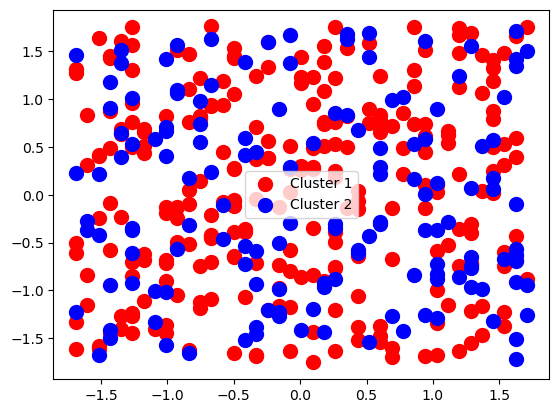

In [32]:
#Plot Graph Original Data  
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y == 1,0],x[y == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show()


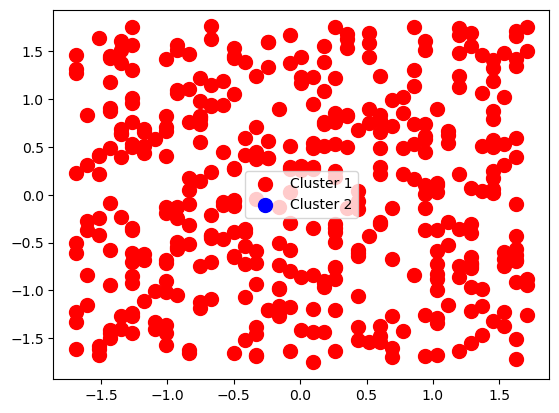

In [33]:
#Plot Graph Prediction Data 

plt.scatter (x[y_pred == 0,0],x[y_pred == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y_pred == 1,0],x[y_pred == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show()
